# Outliers and individual rerouting
## Start with loading all necessities for dashboard creation

In [1]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import pygeos as pyg
import sys
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array

sys.path.append("../scripts")
from utils import *
from Europe_utils import *

config = load_config()

In [2]:
from visualisations_new import aggregate_results_step1, aggregate_results_step2, percolation_summary
from visualisations_new import main
df,df_abs,df_rel = main(config)

perc_overview = percolation_summary(df)
perc_overview
#perc_overview.to_csv('Completeness_14-5-2021.csv',sep=';')

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'disrupted', 'avg extra time', 'AoI removed',
       'no detour', 'country'],
      dtype='object')
Available for 28 countries
Grouping per AoI-country combination
 -------- main() finished --------


,AoIs,Reps_unique,Mode_reps,Frequency_mode_reps
Albania,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[176, 200, 1]",200,14
Austria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18
Belgium,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[183, 500, 1]",500,14
Bulgaria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,19
Croatia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,17
Czechia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18
Denmark,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[67, 500, 1]",500,13
Estonia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[139, 200, 1]",200,14
Finland,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,29
France,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[172, 176, 161, 171, 173, 164, 167, 163, 169, ...",172,5


### Load required input data

<AxesSubplot:>

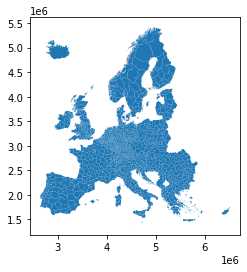

In [3]:
#LOAD NUTS DATA
N3_path = config['paths']['NUTS_shapes'] / 'NUTS_RG_01M_2016_3035_LEVL_3.shp'
N3 = gpd.read_file(N3_path)
N3 = N3.loc[~N3["NUTS_ID"].isin(NUTS_3_remote())] #Remote overseas territories
N3 = N3.loc[~(N3["CNTR_CODE"] == "TR")] #Remove Turkey
#N3 = N3.to_crs("epsg:4326")
N3.plot()

In [4]:
graphs_folder = load_config()['paths']['graphs_folder']

In [5]:
stats_path = config['paths']['data'] / ('descriptive_stats.csv')
stats = pd.read_csv(stats_path,delimiter=';',index_col=0)
stats.head(n=2)

,Edge_No,Node_No,Density,Clique_No,Ave_Path_Length,Assortativity,Diameter,Edge_Connectivity,Max_Degree,Total_Edge_Length,Len_Motorway,Len_Primary,Len_Secondary,Len_Tertiary,Len_Trunk
BE,65778.0,42729.0,0.000072,3.0,74.516557,0.079687,202.0,1.0,10.0,3.474952e+07,4.660953e+06,5.673878e+06,8.168529e+06,1.434923e+07,1.896923e+06
IE,31168.0,20325.0,0.000151,4.0,67.395056,0.012874,207.0,1.0,12.0,3.930866e+07,2.322177e+06,2.750245e+06,1.356214e+07,1.853443e+07,2.139660e+06


In [6]:
#Load centroids of NUTS-2 and NUTS-3 regions (made in the preprocessing scripts)
centroids_n2 = config['paths']['data'] / 'europe_nuts2_centroids.feather'
centroids_n3 = config['paths']['data'] / 'europe_nuts3_centroids.feather'
assert (centroids_n2.exists() and centroids_n3.exists())
centroids_n2 =pd.read_feather(centroids_n2)
centroids_n2['geometry'] = centroids_n2['geometry'].apply(wkt.loads)
centroids_n2 = gpd.GeoDataFrame(centroids_n2)
centroids_n2.crs = 'epsg:4326'
centroids_n2 = centroids_n2.to_crs('epsg:3035')
centroids_n3 =pd.read_feather(centroids_n3)
centroids_n3['geometry'] = centroids_n3['geometry'].apply(wkt.loads)
centroids_n3 = gpd.GeoDataFrame(centroids_n3)
centroids_n3.crs = 'epsg:4326'
centroids_n3 = centroids_n3.to_crs('epsg:3035')
centroids_n3 = centroids_n3.loc[~centroids_n3["NUTS_ID"].isin(NUTS_3_remote())]
centroids_n3 = centroids_n3.loc[~(centroids_n3["CNTR_CODE"] == "TR")]
#centroids_n3.plot()

In [7]:
import visualisations_new as vis
#LOAD RESULTS OF THE PERCOLATION: DISRUPTED ROUTES
df,df_abs,df_rel = vis.main(config)
df.head(n=2)

#LOAD AND PROCESS NO DETOUR RESULTS
no_dt_abs, no_dt_rel = vis.process_no_detour(df)

#LOAD AND PROCESS EXTRA TIME VISUALISATIONS
extra_time_abs,extra_time_rel = vis.process_extra_time(df)
all_countries = df['country'].unique()
print(all_countries)

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'disrupted', 'avg extra time', 'AoI removed',
       'no detour', 'country'],
      dtype='object')
Available for 28 countries
Grouping per AoI-country combination
 -------- main() finished --------
 -------- Process_no_detour() finished --------
 -------- Process_extra_time() finished --------
['Albania' 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Ireland'
 'Latvia' 'Lithuania' 'Macedonia' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland']


# Select country to make dashboard for

In [8]:
country = 'France'
c = country_code_from_name(country)
c

'FR'

# Select outliers

In [9]:
#select outliers
def select_top_n(df,country,top_n=10,nr_aois=1,Type='disrupted'):
    """
    Select AoIs with largest disruption AoI:
    
    Arguments:
        *df* (DataFrame) : DataFrame with raw result of percolation analysis (output of vis.main)
        *country* (string) : name of country (e.g. 'Austria')
        *top_n* (int) : number of worst cases to select (default 10)
        *nr_aois* (int) : nr_aois removed at the same time in the percolation analysis
        *Type* (string) : disruption type to consider (default='disrupted', other options: 'avg extra time', 'no detour')
    """
    df2 = df.loc[(df.country == country) & (df['AoI combinations'] == nr_aois)]
    df2 = df2.sort_values(by=Type,ascending=False).iloc[0:top_n,:]
    df2['old_index'] = df2.index
    df2 = df2.reset_index(drop=True)
    df2.index.name = 'rank'
    df2['AoI removed'] = df2['AoI removed'].astype('float').astype('int')
    return df2[[Type,'AoI removed']]
Type = 'no detour'
df2 = select_top_n(df,country = country,top_n = 10,nr_aois = 1,Type = Type)    
df2

,no detour,AoI removed
rank,,
0,0.0,26866
1,0.0,24268
2,0.0,31938
3,0.0,31947
4,0.0,32068
5,0.0,32080
6,0.0,32084
7,0.0,40437
8,0.0,32347


### Select the rank which you want to plot

In [10]:
rank = 5
aoi = df2.iloc[rank,1]
aoi

32080

### Prepare some helper functions (for the dashboard)

In [11]:
def prepare_stats(c_stats,length_cols):
    """
    Prepare a nice looking string with the network statistics
    
    Arguments:
        *c_stats* (DataFrame) : df with one row with the countries statistics
        *length_cols* (list) : list with names of the columns containing the length of the network for different road types
        
    Returns:
        *text1* (string) : Text string with the statistics
    """
    text1 = ""
    for l in length_cols:
        text1 = text1 + str(l) + ' : {:.0f}'.format(c_stats[l].values[0] * 10 **(-3)) + ' km' + ' \n'
    text1 = text1 + "\n\n"
    text1 = text1 + 'Nr Edges: '+'{:.0f}'.format(c_stats['Edge_No'].values[0]) + '\n'
    text1 = text1 + 'Nr Nodes: '+'{:.0f}'.format(c_stats['Node_No'].values[0]) + '\n'
    text1 = text1 + 'Density: ' +'{:.8f}'.format(c_stats['Density'].values[0]) + '\n'
    text1 = text1 + 'Clique_No: ' +'{:.1f}'.format(c_stats['Clique_No'].values[0]) + '\n'
    text1 = text1 + 'Average path length: ' +'{:.1f}'.format(c_stats['Ave_Path_Length'].values[0]) + '\n'
    text1 = text1 + 'Assortativity: ' +'{:.3f}'.format(c_stats['Assortativity'].values[0]) + '\n'
    text1 = text1 + 'Diameter: ' +'{:.0f}'.format(c_stats['Diameter'].values[0]) + '\n'
    text1 = text1 + 'Edge_Connectivity: ' +'{:.3f}'.format(c_stats['Edge_Connectivity'].values[0]) + '\n'
    text1 = text1 + 'Max degree: ' +'{:.1f}'.format(c_stats['Max_Degree'].values[0]) + '\n'
    return text1

In [12]:
from collections import Counter

def edge_count_optimal_routes(optimal_routes):
    """
    Arguments:
        *optimal_routes* (DataFrame) : Dataframe from feather file with optimal routes per OD-pair
    Returns:
        *counter* (Counter object) : Sort of dictionary, with keys beying the edges, and values in how many routes they are used
        *to_plot* (dict) : #Dict with keys being the frequencies, values the edges occuring with certain frequency
    """
    all_routes = []
    for route in optimal_routes.e_ids.values:
        route_edges = [int(e) for e in route[1:-1].split(', ')]
        all_routes.extend(route_edges)
        counter = Counter(all_routes)
    
    ##List with frequencies that occur for edges (how many routes use the edge) in this country 
    freqs = list(set(counter.values())) #List with unique frequencies
    to_plot = dict.fromkeys(freqs) #Dict with keys being the frequencies, values the edges occuring with certain frequency
    for key in to_plot.keys():
        values = []
        for key2, values2 in dict(counter).items():
            if values2 == key: values.append(key2)
        to_plot[key] = values
    to_plot
    
    
    return(counter,to_plot)

#counter, to_plot = edge_count_optimal_routes(optimal_routes)

In [13]:
#Load groups (for bottom row plots)
import pickle
groups_file = config['paths']['data'] / 'groups' / 'group_4_by_nr_AoI.p'
with open(groups_file,'rb') as f:
    groups = pickle.load(f)
print(groups)

[('France', 'Spain', 'Germany', 'Sweden'), ('Poland', 'Finland', 'Romania', 'Norway'), ('Hungary', 'Bulgaria', 'Serbia', 'Austria'), ('Greece', 'Czechia', 'Portugal', 'Croatia'), ('Slovakia', 'Lithuania', 'Latvia', 'Switzerland'), ('Ireland', 'Belgium', 'Albania', 'Netherlands'), ('Macedonia', 'Estonia', 'Slovenia', 'Denmark')]


### Color settings for plot

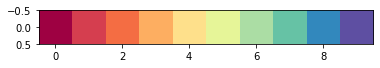

In [14]:
colors = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
roads_cc = colors[0:5][::-1] #We iterate over the roads in reversed order
roads_lw_cc = [1,0.7,0.5,.3,.3][::-1] #linewidth cycler
nuts_fill = '#abdda4'
nuts_border = '#66c2a5'

length_cols = ['Total_Edge_Length', 'Len_Motorway', 'Len_Trunk', 'Len_Primary', 'Len_Secondary', 'Len_Tertiary']

road_types = ['motorway','trunk','primary','secondary','tertiary']

plt.imshow(to_rgba_array(colors).reshape(1,len(colors),4))
plt.show()

### Creating one dashboard

In [ ]:
save_pdf=False,
save_png=False
fb=('q_05','q_95')


if True:
    fig = plt.figure(figsize=(1.5*16,1.5*9))


    nrows=3
    ncols=3
    hr = [3,1,1]

    grid = plt.GridSpec(nrows=nrows,ncols=ncols, wspace = .2, hspace = .2, figure=fig, height_ratios=hr)

    ax00 = fig.add_subplot(grid[0, 0:2])
    ax03 = fig.add_subplot(grid[0, 2])
    ax10 = fig.add_subplot(grid[1, 0])
    ax11 = fig.add_subplot(grid[1, 1])
    ax12 = fig.add_subplot(grid[1, 2])
    ax20 = fig.add_subplot(grid[2, 0])
    ax21 = fig.add_subplot(grid[2, 1])
    ax22 = fig.add_subplot(grid[2, 2])

    
    ######################################## TOP PANEL (MAP top left) ###############################################
    #PLOT COUNTRY
    N3_sel = N3.loc[(N3["CNTR_CODE"] == c)]
    N3_sel.plot(ax=ax00,facecolor=nuts_fill,alpha=0.3,edgecolor=nuts_border)

    if True:
        #PLOT NETWORK
        L3 = N0_to_3L(c)
        edges_file = graphs_folder / '{}-edges.feather'.format(L3)
        #assert c,edges_file.exists()
        network = pd.read_feather(edges_file)
        network['geoms'] = pyg.io.to_wkt(
            pyg.from_wkb(network.geometry))  # see if this should be activated with the new feather files
        network['geoms'] = network['geoms'].apply(wkt.loads)
        network.drop('geometry', axis=1, inplace=True)
        network.rename(columns={'geoms': 'geometry'}, inplace=True)
        network['highway_mapped'] = network['highway'].map(highway_mapper())

        for r,road_type in enumerate(road_types[::-1]):
            ns = network.loc[network['highway_mapped'] == road_type]
            ns = gpd.GeoDataFrame(ns)
            ns.plot(color=roads_cc[r],ax=ax00,linewidth=roads_lw_cc[r])
    
    
    #ADD SHADING ON TOP OF THE ROUTES THAT ARE USED IN PREFERRED ROUTES BETWEEN OD-PAIRS
    #Todo: move to more appropriate location
    #optimal_routes = config['paths']['preproc_output']  / 'optimal_routes_time_{}.feather'.format(country_names(c).lower())
    country_name = country_names(c).lower()
    optimal_routes = config['paths']['preproc_output']  / '{}/optimal_routes_time_{}.feather'.format(country_name,country_name)
    #assert optimal_routes.exists()
    optimal_routes =pd.read_feather(optimal_routes)
    
    counter, to_plot = edge_count_optimal_routes(optimal_routes)
    for key in to_plot.keys():
        #key = 10 #plot edges used by n routes
        lw = 0.5 + 0.2 *key
        sn = network.loc[network['id'].isin(to_plot[key])]
        sn = gpd.GeoDataFrame(sn)
        sn.plot(ax=ax00,color='yellow',linewidth=lw,alpha=0.5)
    
    #PLOTS CENTROIDS OF NUTS-REGIONS
    centroids_n2.loc[centroids_n2['CNTR_CODE'] == c].plot(ax=ax00,color='grey',markersize=20)
    centroids_n3.loc[centroids_n3['CNTR_CODE'] == c].plot(ax=ax00,color='black',markersize=10)
    
    
    ### Removed the data panel, to be replaced with detail plot

    ##### WRITE THE RESULTS OF THE PERCOLATION ANALYSIS ####
    #WRITE PERCOLATION RESULTS
    c_name = country_names(c)

    #Find group that c is in
    group_sel = None
    for group in groups:
        if c_name in group:
            group_sel = group
    
    #Set colors for aggregated lineplots
    index_in_list = group_sel.index(c_name)
    plot_colors = colors[5:9]
    plot_colors[index_in_list] = colors[1] #Make country of this dashboard red
    
    #TODO: ADD THE OTHER COUNTRIES IN THE SAME GROUP, BUT SHADED GREY
    ax10.set_title('Disruption of preferred routes')
    fig, ax10 = vis.boxplot_one_country(df,c_name,fig=fig,ax=ax10)
    fig, ax20 = vis.aggregated_lineplot_new(df_abs,group_sel,fig=fig,ax=ax20,fill_between=fb,clrs=plot_colors)

    ax11.set_title('Routes without detour')
    fig, ax11 = vis.no_detour_boxplot(df,c_name,save=False,fig=fig,ax=ax11)
    fig, ax21 = vis.no_detour_aggregated_lineplot(no_dt_abs,group_sel,fig=fig,ax=ax21,fill_between=fb,clrs=plot_colors)

    ax12.set_title('Extra travel time')
    fig, ax12 = vis.extra_time_boxplot(df,c_name,unit='sec',save=False,fig=fig, ax=ax12)
    fig, ax22 = vis.extra_time_aggregated_lineplot(extra_time_abs, group_sel, fill_between=fb, fig=fig,ax=ax22,clrs=plot_colors)

    
    for ax in [ax10,ax20,ax11,ax21]:
        ax.set_ylim(0,100)

#create_dashboard('AT',save_pdf=False,save_png=False)

# Now, let's try to reproduce the disrupted routes

In [497]:
from shapely.geometry import Polygon

#Helper functions
def edgeseq_to_dict(es):
    """Convert all data in a Igraph EdgeSeq into a dict
    
    Arguments:
        *es* (iGraph EdgeSeq) : the EdgeSeq (typically a selection of the edges of the graph)
        
    Returns:
        *d* (dict) : the dict with all metadata
    """ 
    d = {}
    for key in es.attributes():
        d[key] = es[key]
    return d

def box_around_linestrings(lst):
    """Finds the x and y coords of the smallest rectangle around a list of linestrings
    
    Arguments:
        *lst* (list) : list of Shapely geometry linestrings
    
    Returns:
        *x_min* (float)
        *x_max* (float)
        *y_min* (float)
        *y_max* (float)
    
    """
    #start with extremely large values which are always overruled
    min_x = 1e10
    max_x = 1e-10
    min_y = 1e10
    max_y = 1e-10
    for ls in lst: #iterate over linestrings
        x, y = ls.xy
        x = list(x)
        y = list(y)

        if min(x) < min_x: min_x = min(x) #update min_x if smaller than largest found value
        if min(y) < min_y: min_y = min(y)
        if max(x) > max_x: max_x = max(x)
        if max(y) > max_y: max_y = max(y)
    return min_x,max_x,min_y,max_y

In [498]:
import sys
sys.path.append("../scripts")
from percolation_optimized_parallel import import_graph
G = import_graph(N0_to_3L(c))

#Select the disrupted part of the network

### OLD VERSION: SELECT IF MAJORITY INTERSECTS
#aoi_es = G.es.select(AoI_RP100y_majority_eq=float(aoi)) #.select hoeft niet perse, can ook shorthand


### NEW VERSION: SELECT IF ANY OVERLAP 
#Select unique AoIs
es_aois = G.es['AoI_RP100y_unique']
selection = [False] * len(es_aois)
indices = [] #indices of the edges intersected by the selected aoi
for i,edge in enumerate(es_aois):
    if aoi in edge:
        indices.append(i)
aoi_es = G.es.select(indices)
## -- ##
gdf_aoi_es = gpd.GeoDataFrame(edgeseq_to_dict(aoi_es)) #GeoDataFrame of edges for selected AoI
gdf_aoi_es.plot(ax=ax00,color=colors[-1],zorder=5,alpha=1,linewidth=5)
gdf_aoi_es.head()

IGRAPH U--- 7622 5780 -- 
+ attr: id (v), nuts3 (v), AoI_RP100y_majority (e), AoI_RP100y_unique (e), RP100_cells_intersect (e), RP100_max_flood_depth (e), distance (e), fds__unique (e), fds_majority (e), geometry (e), id (e), time (e)


,distance,time,geometry,id,RP100_cells_intersect,RP100_max_flood_depth,AoI_RP100y_majority,AoI_RP100y_unique,fds_majority,fds__unique
0,5502.540459,0.137564,"LINESTRING (5170340.000 2059250.000, 5170430.0...",480,4,1.20,0.0,"[48526, 48527, 48639]",50.0,[50]
1,4324.467703,0.108112,"LINESTRING (5170490.000 2055640.000, 5170500.0...",481,1,0.55,0.0,"[48526, 48639]",50.0,[50]


<Figure size 432x288 with 0 Axes>

In [499]:
# FIND A NARROW AND WIDE BOX AROUND THE FLOODED BOX
mrgn = 10e3 #size of bounding box around flood (m)

min_x,max_x,min_y,max_y = box_around_linestrings(aoi_es['geometry'])
bbox_narrow = Polygon([[min_x-mrgn,min_y-mrgn],[max_x+mrgn,min_y-mrgn],[max_x+mrgn,max_y+mrgn],[min_x-mrgn,max_y+mrgn]])
bbox_wide = Polygon([[min_x-mrgn,min_y-mrgn],[max_x+mrgn,min_y-mrgn],[max_x+mrgn,max_y+mrgn],[min_x-mrgn,max_y+mrgn]])
gdf_bboxes = gpd.GeoDataFrame({'name':['narrow','wide'],'geometry':[bbox_narrow,bbox_wide]})
#gdf_bbox.plot(ax=ax00,color='red',zorder=5,alpha=1)
#fig
#gdf_bboxes.loc[gdf_bboxes['name' ]== 'narrow'].plot()
gdf_bboxes

,name,geometry
0,narrow,"POLYGON ((5160340.000 2045640.000, 5184570.000..."
1,wide,"POLYGON ((5160340.000 2045640.000, 5184570.000..."


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


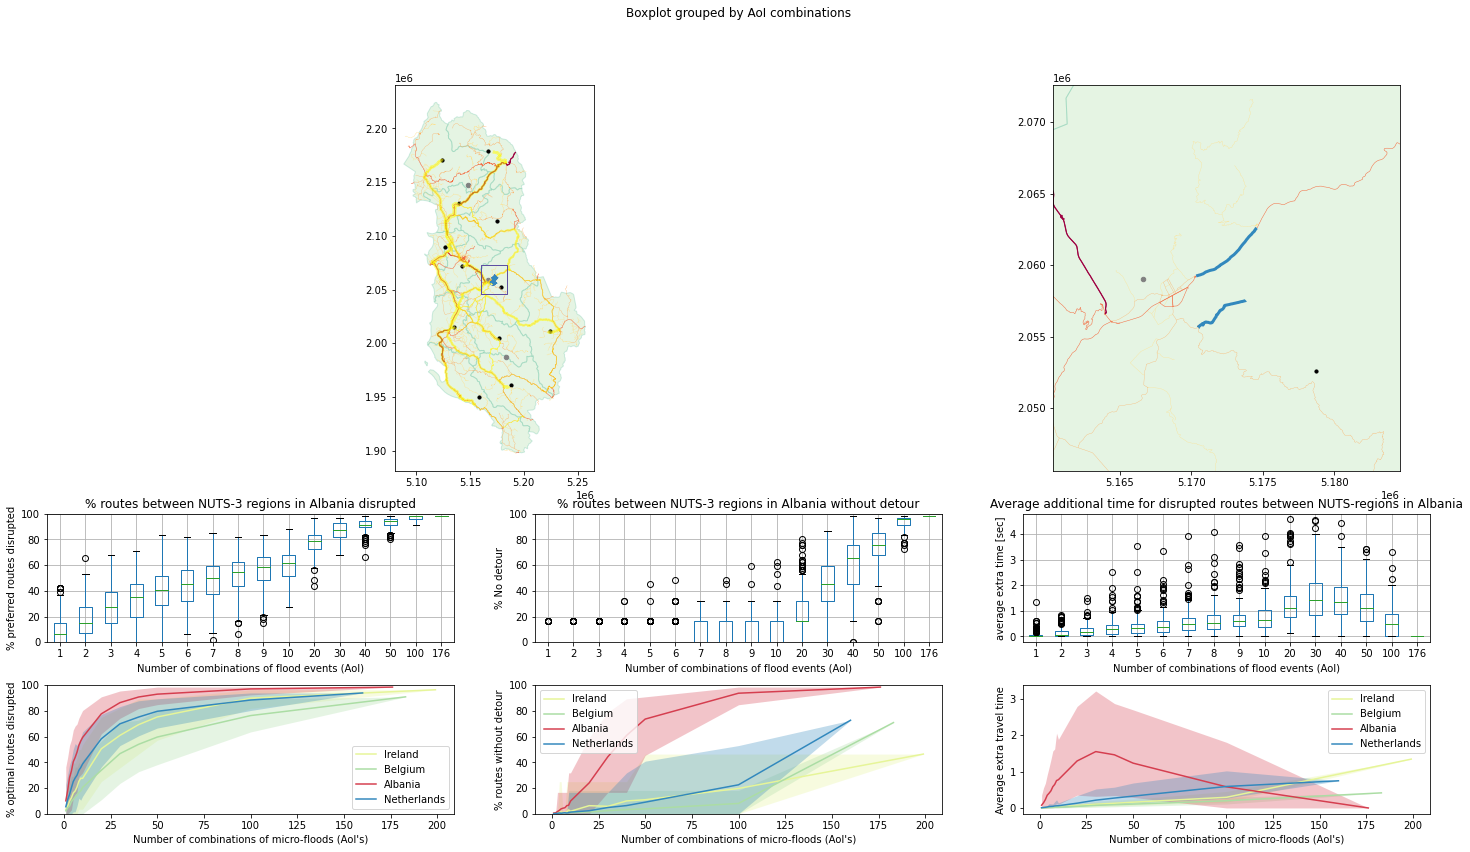

<Figure size 432x288 with 0 Axes>

In [500]:
#PLOT FLOOD IN THE MAIN PANEL
#gdf_aoi_margin.plot(ax=ax00,color=colors[-2],zorder=3,alpha=0.3) #circle around AoI
gdf_aoi_es = gpd.GeoDataFrame(edgeseq_to_dict(aoi_es)) #GeoDataFrame of edges for selected AoI
gdf_aoi_es.plot(ax=ax00,color=colors[-2],zorder=5,alpha=1,linewidth=5)
#Todo: instead first merge the road data to this dataframe, and iterate over the network [at lest in the top right panel]
gdf_bboxes.loc[gdf_bboxes['name' ]== 'wide'].plot(ax=ax00,edgecolor=colors[-1],zorder=6,facecolor="none") #None raise default behaviour


### PLOT DETAIL RIGHT-TOP
xmin=min_x-mrgn
xmax=max_x+mrgn
ymin=min_y-mrgn
ymax=max_y+mrgn

N3_sel.plot(ax=ax03,facecolor=nuts_fill,alpha=0.3,edgecolor=nuts_border)


for r,road_type in enumerate(road_types[::-1]):
    ns = network.loc[network['highway_mapped'] == road_type]
    ns = gpd.GeoDataFrame(ns)
    ns = ns.cx[xmin:xmax,ymin:ymax] #crop within bounding box
    ns.plot(color=roads_cc[r],ax=ax03,linewidth=roads_lw_cc[r])

#PLOTS CENTROIDS OF NUTS-REGIONS
centroids_n2.loc[centroids_n2['CNTR_CODE'] == c].plot(ax=ax03,color='grey',markersize=20)
centroids_n3.loc[centroids_n3['CNTR_CODE'] == c].plot(ax=ax03,color='black',markersize=10)

#Plot inundated segment
gdf_aoi_es.plot(ax=ax03,color=colors[-2],zorder=5,alpha=1,linewidth=3)

ax03.set_xlim(xmin,xmax)
ax03.set_ylim(ymin,ymax)

fig

### Find the corresponding affected routes

In [501]:
#Indicate affected routes

from percolation_optimized_parallel import import_optimal_routes
optimal_routes = import_optimal_routes('austria')
optimal_routes

,o_node,d_node,origin,destination,v_ids,time,e_ids
0,1032,1821,AT223,AT113,"[1032, 12837, 5152, 5153, 5125, 5154, 6682, 16...",1.729583,"[10383, 29835, 30900, 4050, 4051, 17642, 30048..."
1,1032,2558,AT223,AT332,"[1032, 12837, 5152, 5153, 5125, 5154, 6682, 16...",4.583732,"[10383, 29835, 30900, 4050, 4051, 17642, 30048..."
2,1032,2684,AT223,AT130,"[1032, 12837, 5152, 5153, 5125, 5154, 6682, 16...",1.469754,"[10383, 29835, 30900, 4050, 4051, 17642, 30048..."
3,1032,4532,AT223,AT321,"[1032, 12837, 5152, 5153, 5125, 5154, 6682, 16...",1.883696,"[10383, 29835, 30900, 4050, 4051, 17642, 30048..."
4,1032,4764,AT223,AT221,"[1032, 12837, 5152, 5153, 5125, 5154, 6682, 16...",0.728287,"[10383, 29835, 30900, 4050, 4051, 17642, 30048..."
...,...,...,...,...,...,...,...
590,29267,31522,AT342,AT226,"[29267, 29268, 30324, 32017, 30325, 28963, 249...",5.433633,"[37260, 40549, 47769, 47765, 26203, 36237, 275..."
591,29267,31762,AT342,AT125,"[29267, 29268, 30324, 32017, 30325, 28963, 249...",7.412377,"[37260, 40549, 47769, 47765, 26203, 36237, 275..."
592,29692,31522,AT311,AT226,"[29692, 10920, 10896, 25345, 12269, 12270, 312...",1.890336,"[10345, 16873, 24331, 28296, 10293, 21221, 212..."
593,29692,31762,AT311,AT125,"[29692, 10920, 10896, 25345, 12269, 12270, 312...",2.703179,"[10345, 16873, 24331, 28296, 10293, 21221, 212..."


In [502]:
#Find affected od_pairs
import json
def find_affected_edges(optimal_routes,edgeseq):
    """
    
    Arguments:
        *optimal_routes* : df from import_optimal_routes
        *edgeseq* (igrpah EdgeSequence* :
    
    Returns:
        *optimal_routes : same dataframe, with flags
    """
    o_r = optimal_routes.copy()
    sel_ids = edgeseq["id"]
    o_r['flag'] = o_r['e_ids'].apply(lambda cell: len([ID for ID in json.loads(cell) if ID in sel_ids]))
    #Todo: they all count 2; is that true?
    return o_r

o_r = find_affected_edges(optimal_routes,aoi_es)
optimal_routes_disrupted = o_r.loc[o_r['flag'] > 0]

In [503]:
optimal_routes_disrupted
all_ods = list(optimal_routes_disrupted['origin']) + list(optimal_routes_disrupted['destination'])

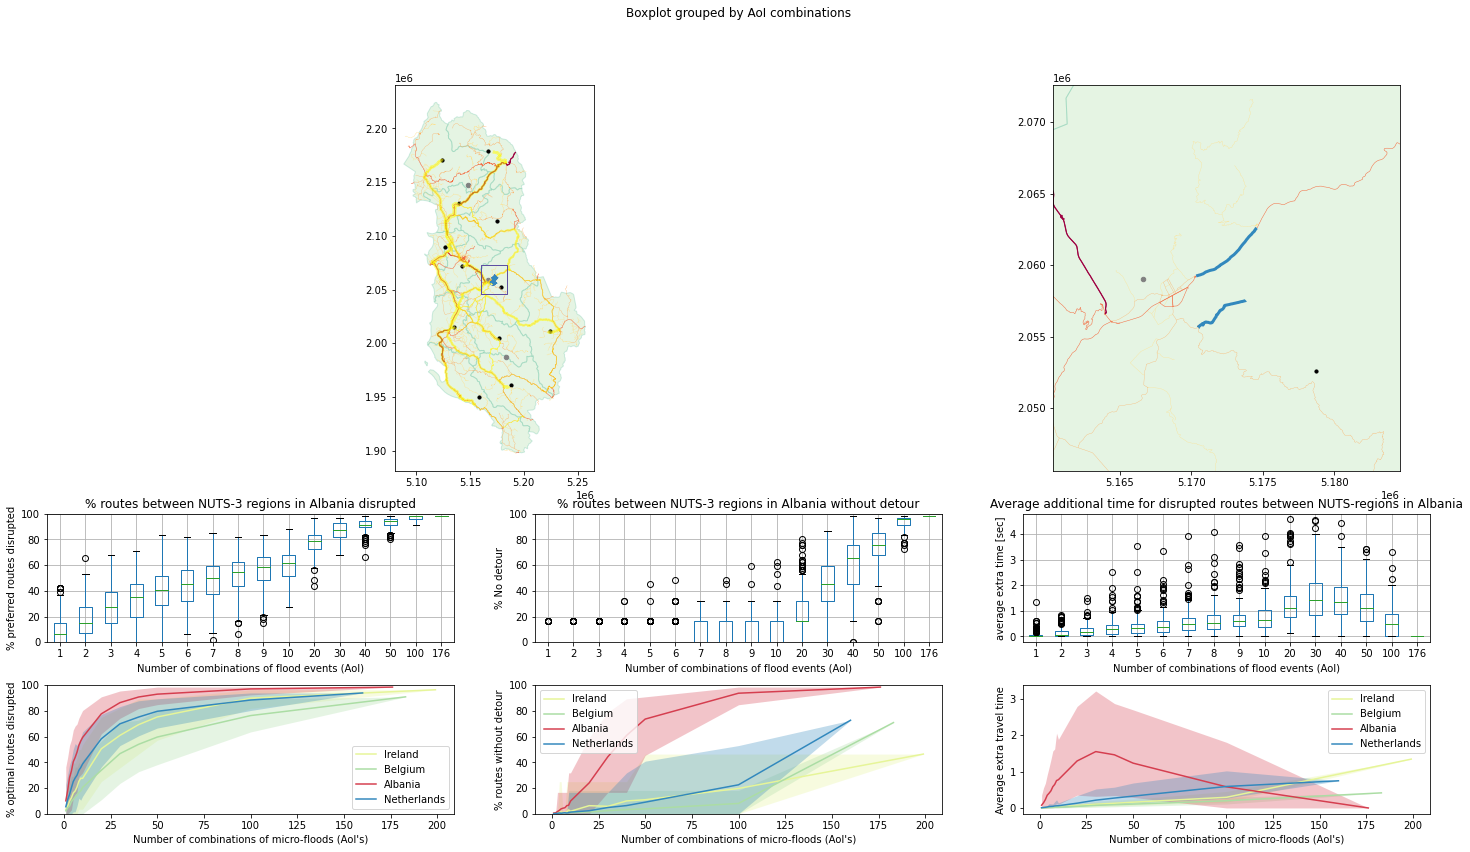

<Figure size 432x288 with 0 Axes>

In [504]:
from collections import Counter
OD_affected_frequency = dict(Counter(all_ods))
country_n3 = centroids_n3.loc[centroids_n3['CNTR_CODE'] == c]
country_n3['OD_affected_frequency'] = country_n3['NUTS_ID'].map(OD_affected_frequency)
country_n3.plot(ax=ax00,column="OD_affected_frequency",cmap="RdYlGn_r",markersize=40,zorder=10)
fig

In [505]:
def aoi_str_to_list(cell):
    """
    Converts string in cell to list of integers
    
    e.g. '[34466, 32798'] -> [34466, 32798] 
    e.g. '34466.' -> [34466]
    """
    cell = json.loads(cell) #returns float or list of ints
    if isinstance(cell,float):
        cell = [int(cell)]
    elif isinstance(cell,list):
        cell = cell #already in the right format
        assert isinstance(cell[0],int)
    return cell 

#CONVERT ALL AOI STRINGS (LIST AND FLOATS) TO LIST OF INTEGERS
df['AoI_removed_list'] = df['AoI removed'].map(lambda x: aoi_str_to_list(x))

In [506]:
#FLAG THE RELEVANT VALUES
df['AoI_flag'] = df['AoI_removed_list'].map(lambda x: aoi in x)

In [507]:
aoi_matches = df.loc[df['AoI_flag']] #dataframe with the selected aoi
aoi_matches.head()

,AoI combinations,disrupted,avg extra time,AoI removed,no detour,country,AoI relative combinations,AoI_removed_list,AoI_flag
44,1,24.242424,0.012633,48526.0,16.666667,Albania,0.568182,[48526],True
177,10,81.818182,1.276481,"[48526, 51271, 46175, 50196, 49270, 50691, 485...",31.818182,Albania,5.681818,"[48526, 51271, 46175, 50196, 49270, 50691, 485...",True
183,10,77.272727,1.679766,"[48896, 48189, 48769, 49268, 47775, 50786, 464...",16.666667,Albania,5.681818,"[48896, 48189, 48769, 49268, 47775, 50786, 464...",True
205,10,60.606061,0.636346,"[47315, 50994, 49669, 48526, 49271, 48770, 508...",31.818182,Albania,5.681818,"[47315, 50994, 49669, 48526, 49271, 48770, 508...",True
229,10,81.818182,1.539376,"[47201, 50398, 49414, 48894, 50897, 49541, 498...",16.666667,Albania,5.681818,"[47201, 50398, 49414, 48894, 50897, 49541, 498...",True


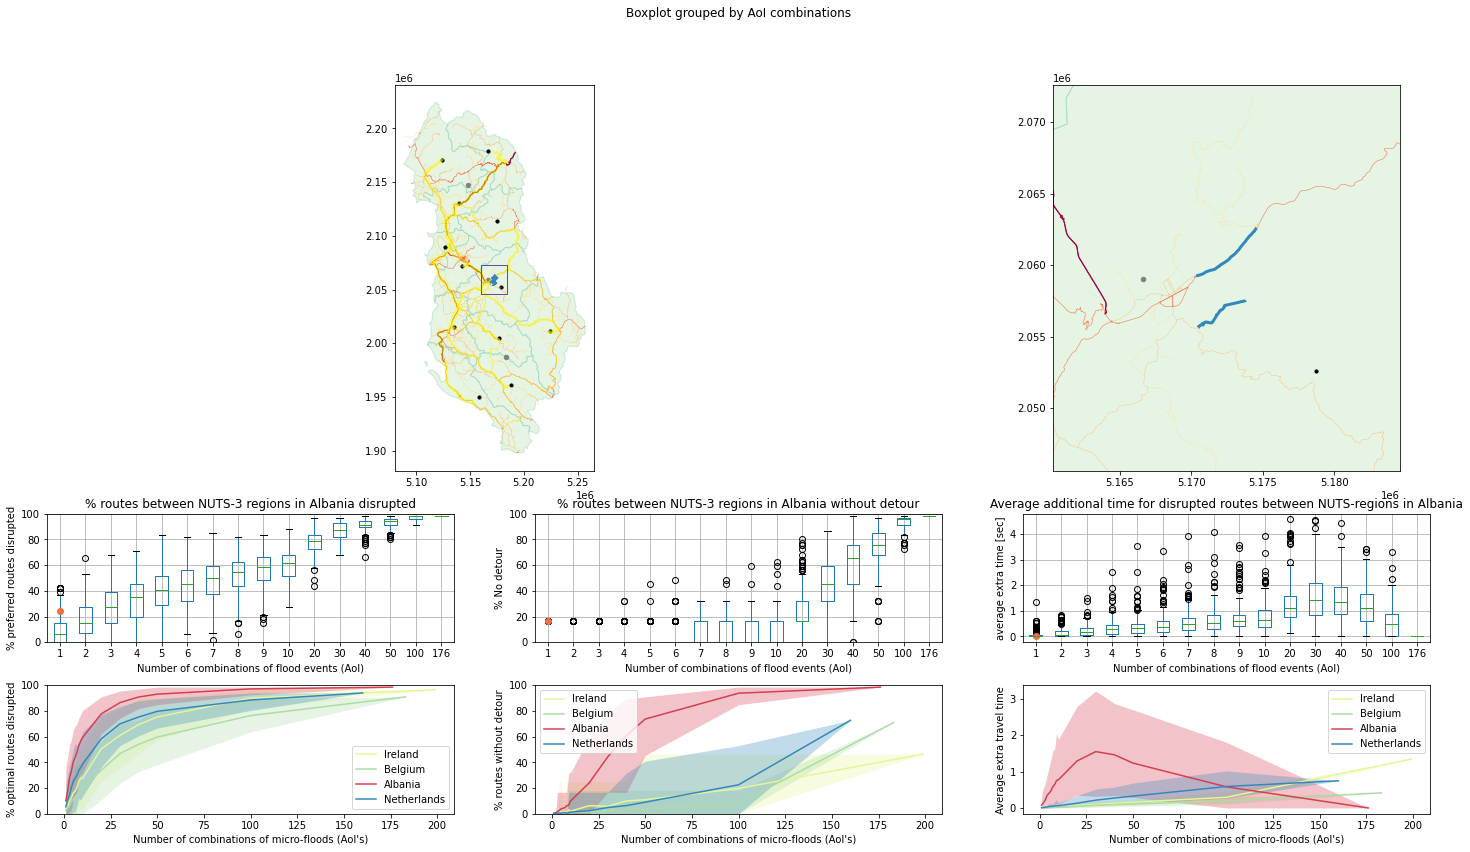

In [508]:
#For now, limit to the first x-value (one aoi at a time)
#Problem with more values: the x-values are not scaled
nr_aoi = 1
#Disruption of preferred routes
y = aoi_matches.loc[aoi_matches['AoI combinations'] == nr_aoi]['disrupted'].values[0]
ax10.plot([nr_aoi],[y],'o',color=colors[2])
#No detour 
y = aoi_matches.loc[aoi_matches['AoI combinations'] == nr_aoi]['no detour'].values[0]
ax11.plot([nr_aoi],[y],'o',color=colors[2])
#Additional travel time
y = aoi_matches.loc[aoi_matches['AoI combinations'] == nr_aoi]['avg extra time'].values[0]
ax12.plot([nr_aoi],[y],'o',color=colors[2])
fig

In [509]:
rank = str(rank)
save_png = True
#if save_pdf: fig.savefig('dashboards_outliers/{}_{}_top{}.pdf'.format(c,Type,rank),bbox_inches='tight',dpi=500)
if save_png: fig.savefig('dashboards_outliers/{}_{}_top{}.png'.format(c,Type,rank),bbox_inches='tight',dpi=500)
if save_pdf or save_png: print('dashboard for {} saved'.format(c))

dashboard for AL saved
